## Step - 5 - Research Questions
#### <p>Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.</p>

Step - 1:

Alternate Hypothesis (Bold claim):$$ H_1: \mu \ > \ 3LPA  $$

Null Hypothesis (Status Quo):$$ H_0: \mu \leq \ 3LPA  $$

Step 2: Collect the Sample of size n = 20 and calculate the sample mean

In [2]:
# Step 2: Collect the Sample of size n = 20 and calculate the sample mean
Sample1 = [2.8, 2.7, 3, 3, 3.5, 2.8, 2.5, 3 , 3, 2.9 , 2.8 , 3, 2.5, 2.9, 2.85, 2.85, 3, 2.7, 2.5, 2.5]
xbar = sum(Sample1)/len(Sample1)
xbar

2.8400000000000003

Step 3: Compute Test Statistic: Here in case $\sigma$ (Population Variance is not given) that's we have compute t score by using this formula $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

To Calculate the t score first we have calculate s (Standard Deviation) by using $$ s = \sqrt{\frac{\sum(x_i - \bar{x})^{2}}{n-1}}$$

In [3]:
# Step 3: Compute Test Statistic: Here in case  𝜎  (Population Variance is not given) that's why we have compute t score and 
# To Calculate the t score first we have calculate s (Standard Deviation) 
# Without using Function 
import math

def vari(Sample,ddof=1):
    n = len(Sample)
    mean = sum(Sample)/n
    return sum((x - mean) ** 2 for x in Sample) / (n - ddof)

def stdev(Sample):
    var = vari(Sample)
    s = math.sqrt(var)
    return s

S = stdev([2.8, 2.7, 3, 3, 3.5, 2.8, 2.5, 3 , 3, 2.9 , 2.8 , 3, 2.5, 2.9, 2.85, 2.85, 3, 2.7, 2.5, 2.5])   

# With using Function
#import statistics 
#statistics.stdev(Sample1)

In [4]:
# Step 3: Now we have to Compute t score 
def t_score(xbar,mu,std_dev,n):
    numerator = xbar - mu 
    denominator = std_dev/math.sqrt(n)
    return numerator/denominator

xbar = sum(Sample1)/len(Sample1)
mu = 3 
std_dev = S
n = len(Sample1)
tscore = t_score(xbar,mu,std_dev,n)
tscore

-2.969778267072421

Step 4: Decide the significance level or  𝛼

In [6]:
# Step 4: Decide the  significance level or alpha
import scipy.stats    
confidence_level = 0.95
alpha = 1 - confidence_level  

# After deciding the confidence level or alpha we have to calculate the T Critical value  for one tailed test
# As per our Hypothesis we have to check one Tailed Test
t_critical = scipy.stats.t.ppf(q=1-.05,df=19)
print(t_critical)

1.729132811521367


Text(2.8400000000000003, 0.0007, 'x_bar')

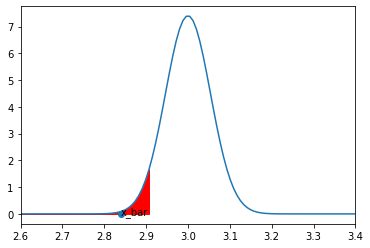

In [16]:
# Now we have to plot sample districbution 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

pop_mean = 3 
sample_size = len(Sample1)
sample_mean = xbar
# Defining the x minimum and x maximum
x_min = 2.6
x_max = 3.4

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = S / (sample_size**0.5)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

Step - 5.1: 

Apply decision rule

If test statistic is t-score

r) Left tailed t-test:$$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [13]:
# Step 5.1 Conculsion using t test
if(np.abs(tscore) < t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


Step 5.2 : Compute p-value $ P(Test \ Statistics | H_0) $

b) For one tailed test:$$ p \ value = (1.0 - cdf(test \ statistic)) $$

In [14]:
# Step 5.2 Compute p-value  𝑃(𝑇𝑒𝑠𝑡 𝑆𝑡𝑎𝑡𝑖𝑠𝑡𝑖𝑐𝑠|𝐻0) 
p_value = 2 * (1.0 - norm.cdf(np.abs(tscore)))

print("p_value = ", p_value)

# Conculsion 
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.002980147691976409
Reject Null Hypothesis


#### <p>Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)</p>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
Data = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')

In [19]:
Data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [20]:
Data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [22]:
Data.Gender.value_counts()

m    3041
f     957
Name: Gender, dtype: int64

In [23]:
Data.Specialization.value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
information science engineering                 27
electronics and instrumentation engineering     27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

### Lets make a bold Claim that the preference of Specialisation depend on the Gender

Step - 1:
i.e. Alternate Hypothesis:$$ H_1: They \ are \ Dependent $$and Null Hypothesis:$$ H_0: They \ are \ Independent $$

Step - 2:

Collect the sample of size n

Compute the sample frequencies

In [24]:
# Step-2  The freqency distribution

pd.crosstab(Data.Specialization, Data.Gender, margins=True)

Gender,f,m,All
Specialization,,,
aeronautical engineering,1,2,3
applied electronics and instrumentation,2,7,9
automobile/automotive engineering,0,5,5
biomedical engineering,2,0,2
biotechnology,9,6,15
ceramic engineering,0,1,1
chemical engineering,1,8,9
civil engineering,6,23,29
computer and communication engineering,0,1,1


Step - 3: Compute $ \chi^2 $ test statistic
Now you need to check, if the difference in the observed and expected frequencies is too extreme to reject the NULL hypothesis.

<ol><li>Have a look at Observed Frequencies </li></ol>

In [25]:
# These are the observed frequencies

observed = pd.crosstab(Data.Specialization, Data.Gender)

observed

Gender,f,m
Specialization,,
aeronautical engineering,1,2
applied electronics and instrumentation,2,7
automobile/automotive engineering,0,5
biomedical engineering,2,0
biotechnology,9,6
ceramic engineering,0,1
chemical engineering,1,8
civil engineering,6,23
computer and communication engineering,0,1


In [27]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies
from scipy.stats import chi2
from scipy.stats import chi2_contingency
chi2_contingency(observed)

(104.46891913608454,
 1.2453868176977011e-06,
 45,
 array([[7.18109055e-01, 2.28189095e+00],
        [2.15432716e+00, 6.84567284e+00],
        [1.19684842e+00, 3.80315158e+00],
        [4.78739370e-01, 1.52126063e+00],
        [3.59054527e+00, 1.14094547e+01],
        [2.39369685e-01, 7.60630315e-01],
        [2.15432716e+00, 6.84567284e+00],
        [6.94172086e+00, 2.20582791e+01],
        [2.39369685e-01, 7.60630315e-01],
        [5.84062031e+01, 1.85593797e+02],
        [1.43621811e+02, 4.56378189e+02],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.78091046e+02, 5.65908954e+02],
        [1.43621811e+00, 4.56378189e+00],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.96283142e+01, 6.23716858e+01],
        [2.39369685e-01, 7.60630315e-01],
        [7.65982991e+00, 2.43401701e+01],
        [2.89637319e+01, 9.20362681e+01],
        [2.10645323e+02, 6.69354677e+02],
        [7.18109055e-01, 

<ul><li>Compute the Expected Frequencies (under null hyp assumption)</li></ul>

 Decide $ \alpha $ and $ df = (rows-1)(cols-1) $

In [28]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
df = chi2_contingency(observed)[2]

In [29]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, df)

chi2_critical

57.50530474499599

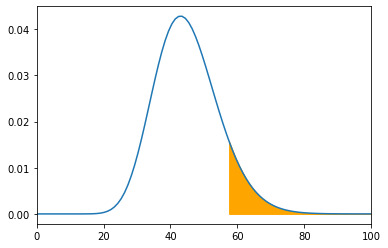

In [31]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 0
x_max = 100

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, df)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, df)
plt.fill_between(x1, y1, color='orange')

Step - 5: Apply decision rule

Chi Square Test $$ if \ \chi^2 >; \chi^2_{df, \alpha} \Rightarrow Reject H_0 $$

In [32]:
#Step - 5: Apply decision rule
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


p-value Test$$ p \ value = (1.0 - cdf(test \ statistic)) $$Now,$$ if (p \ value < \alpha) \Rightarrow Accept H_1 \ or \ Reject H_0 $$

In [33]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


### We Conclude that the preference of Specialisation depend on the Gender